# 7.1 시계열 문제

In [ ]:
# 불규칙 변동 (irregular variation)
# 추세 변동 (trend variation)
# 순환 변동 (cyclical variation)
# 계절 변동 (seasonal variation)

# 7.2 AR, MA, ARMA, ARIMA

## 7.2.1 AR Model

In [ ]:
# AutoRegression

## 7.2.2 MA Model

In [ ]:
# Moving Average

## 7.2.3 ARMA Model

In [ ]:
# AutoRegressive Moving Average

## 7.2.4 ARIMA Model

In [ ]:
# AutoRegressive Integrated Moving Average

In [1]:
!pip install statsmodels

     |████████████████████████████████| 9.1 MB 8.5 MB/s            
     |████████████████████████████████| 233 kB 6.1 MB/s            


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Fri, 13 May 2022   AIC                            411.302
Time:                        18:21:48   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

/var/folders/lt/7j3txvvn1bgc84pp3c9kldcw0000gn/T/ipykernel_44881/1059719870.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


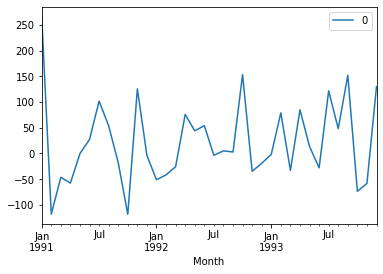

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [6]:
# ARIMA() 함수를 호출하여 sales 데이터셋에 대한 예측

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('data/chap07/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
print(residuals.describe())

/var/folders/lt/7j3txvvn1bgc84pp3c9kldcw0000gn/T/ipykernel_44881/3947531420.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=352.855342, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070418, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690690, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818


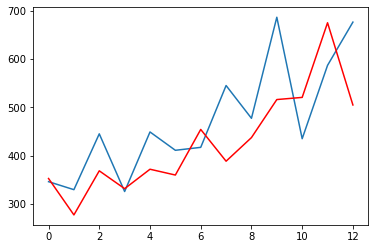

In [7]:
# statsmodels 라이브러리를 이용한 sales 데이터셋 예측

import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('data/chap07/sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# 7.3 순환 신경망 (RNN)

## 7.3.1 RNN 계층과 셀

# 7.4 RNN 구조

## 7.4.1 RNN 셀 구현

In [8]:
# 라이브러리 호출

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [18]:
# 값 초기화

tf.random.set_seed(22)
np.random.seed(22)
assert tf.__version__.startswith('2.')

batch_size = 128
total_words = 10000
max_review_len = 80
embedding_len = 100

In [19]:
# 데이터셋 준비

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=total_words)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_review_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_review_len)

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(10000).batch(batch_size, drop_remainder=True)

test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_data = test_data.batch(batch_size, drop_remainder=True)

print('x_train_shape:', x_train.shape, tf.reduce_max(y_train), tf.reduce_min(y_train))
print('x_test_shape:', x_test.shape)

sample = next(iter(test_data))
print(sample[0].shape)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-

x_train_shape: (25000, 80) tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(0, shape=(), dtype=int64)
x_test_shape: (25000, 80)
(128, 80)


In [22]:
class RNN_Build(tf.keras.Model):
    def __init__(self, units):
        super(RNN_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units])]
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)

        self.RNNCell0 = tf.keras.layers.SimpleRNNCell(units, dropout=0.2)
        self.RNNCell1 = tf.keras.layers.SimpleRNNCell(units, dropout=0.2)
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):
            out0, state0 = self.RNNCell0(word, state0, training)
            out1, state1 = self.RNNCell1(out0, state1, training)
        x = self.outlayer(out1)
        prob = tf.sigmoid(x)
        return prob

In [23]:
# 모델 훈련

import time
units = 64
epochs = 4
t0 = time.time()

model = RNN_Build(units)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'], experimental_run_tf_function=False)

model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 32s 127ms/step - loss: 0.5654 - accuracy: 0.6764
Epoch 2/4
195/195 [==============================] - 36s 184ms/step - loss: 0.3227 - accuracy: 0.8672 - val_loss: 0.3982 - val_accuracy: 0.8262
Epoch 3/4
195/195 [==============================] - 26s 132ms/step - loss: 0.1901 - accuracy: 0.9294
Epoch 4/4
195/195 [==============================] - 33s 169ms/step - loss: 0.0814 - accuracy: 0.9718 - val_loss: 0.6771 - val_accuracy: 0.8177


## 7.4.2 RNN 계층 구현

In [24]:
# 네트워크(신경망) 구축

class RNN_Build(tf.keras.Model):
    def __init__(self, units):
        super(RNN_Build, self).__init__()
        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)

        self.rnn = tf.keras.Sequential([
            tf.keras.layers.SimpleRNN(units, dropout=0.5, return_sequences=True),
            tf.keras.layers.SimpleRNN(units, dropout=0.5)
        ])
        self.outlayer = tf.keras.layers.Dense(1)
    
    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)
        
        return prob

In [ ]:
# 모델 훈련

import time
units = 64
epochs = 4
t0 = time.time()

model = RNN_Build(units)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'], experimental_run_tf_function=False)

model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

# 7.5 LSTM

## 7.5.1 LSTM 구조

In [ ]:
# Forget Gate : 과거 정보를 어느 정도 기억할지 결정
# Input  Gate : 현재 정보를 기억
# Output Gate : 과거 정보와 현재 데이터를 사용하여 뉴련의 출력을 결정

## 7.5.2 LSTM 셀 구현

In [26]:
# 네트워크 생성

class LSTM_Build(tf.keras.Model):
    def __init__(self, units):
        super(LSTM_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units]), tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units]), tf.zeros([batch_size, units])]

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.RNNCell0 = tf.keras.layers.LSTMCell(units, dropout=0.5)
        self.RNNCell1 = tf.keras.layers.LSTMCell(units, dropout=0.5)
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):
            out0, state0 = self.RNNCell0(word, state0, training)
            out1, state1 = self.RNNCell1(out0, state1, training)
        
        x = self.outlayer(out1)
        prob = tf.sigmoid(x)

        return prob

In [27]:
# 모델 훈련

import time
units = 64
epochs = 4
t0 = time.time()

model = LSTM_Build(units)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'], experimental_run_tf_function=False)

model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 83s 326ms/step - loss: 0.4845 - accuracy: 0.7529
Epoch 2/4
195/195 [==============================] - 87s 449ms/step - loss: 0.3105 - accuracy: 0.8694 - val_loss: 0.3763 - val_accuracy: 0.8368
Epoch 3/4
195/195 [==============================] - 54s 275ms/step - loss: 0.2567 - accuracy: 0.8980
Epoch 4/4
195/195 [==============================] - 79s 406ms/step - loss: 0.2174 - accuracy: 0.9146 - val_loss: 0.4126 - val_accuracy: 0.8324


In [28]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

t1 = time.time()
print("시간:", t1-t0)

훈련 데이터셋 평가...
loss=0.1375, accuracy: 95.6450%
테스트 데이터셋 평가...
loss=0.4126, accuracy: 83.2412%
시간: 347.9272859096527


## 7.5.3 LSTM 계층 구현

In [29]:
# 네트워크 생성

class LSTM_Build(tf.keras.Model):

    def __init__(self, units):
        super(LSTM_Build, self).__init__()

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.rnn = tf.keras.Sequential([
            tf.keras.layers.LSTM(units, dropout=0.5, return_sequences=True, unroll=True),
            tf.keras.layers.LSTM(units, dropout=0.5, unroll=True)
        ])
        self.outlayer = tf.keras.layers.Dense(1)
    
    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)

        return prob

In [ ]:
# 모델 훈련

import time
units = 64
epochs = 4
t0 = time.time()

model = LSTM_Build(units)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'], experimental_run_tf_function=False)

model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

# 7.6 게이트 순환 신경망 (GRU)

## 7.6.1 GRU 구조

In [ ]:
# Reset  Gate : 과거 정보를 적당히 초기화시키려는 목적
# Update Gate : 과거와 현재 정보의 최신화 비율을 결정하는 역할

## 7.6.2 GRU 셀 구현

In [34]:
# 네트워크 생성

class GRU_Build(tf.keras.Model):
    
    def __init__(self, units):
        super(GRU_Build, self).__init__()

        self.state0 = [tf.zeros([batch_size, units])]
        self.state1 = [tf.zeros([batch_size, units])]

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.RNNCell0 = tf.keras.layers.GRUCell(units, dropout=0.5)
        self.RNNCell1 = tf.keras.layers.GRUCell(units, dropout=0.5)
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        state0 = self.state0
        state1 = self.state1
        for word in tf.unstack(x, axis=1):
            out0, state0 = self.RNNCell0(word, state0, training)
            out1, state1 = self.RNNCell1(out0, state1, training)
        
        x = self.outlayer(out1)
        prob = tf.sigmoid(x)

        return prob

In [35]:
# 모델 훈련

import time
units = 64
epochs = 4
t0 = time.time()

model = GRU_Build(units)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'], experimental_run_tf_function=False)

model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

Epoch 1/4
195/195 [==============================] - 120s 468ms/step - loss: 0.5133 - accuracy: 0.7302
Epoch 2/4
195/195 [==============================] - 127s 655ms/step - loss: 0.3285 - accuracy: 0.8615 - val_loss: 0.3769 - val_accuracy: 0.8331
Epoch 3/4
195/195 [==============================] - 73s 373ms/step - loss: 0.2720 - accuracy: 0.8903
Epoch 4/4
195/195 [==============================] - 97s 498ms/step - loss: 0.2373 - accuracy: 0.9081 - val_loss: 0.3877 - val_accuracy: 0.8365


In [36]:
print("훈련 데이터셋 평가...")
(loss, accuracy) = model.evaluate(train_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))
print("테스트 데이터셋 평가...")
(loss, accuracy) = model.evaluate(test_data, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

t1 = time.time()
print("시간:", t1-t0)

훈련 데이터셋 평가...
loss=0.1685, accuracy: 94.5312%
테스트 데이터셋 평가...
loss=0.3877, accuracy: 83.6458%
시간: 476.8054096698761


## 7.6.3 GRU 계층 구현

In [37]:
# 네트워크 생성

class GRU_Build(tf.keras.Model):

    def __init__(self, units):
        super(GRU_Build, self).__init__()

        self.embedding = tf.keras.layers.Embedding(total_words, embedding_len, input_length=max_review_len)
        self.rnn = tf.keras.Sequential([
            tf.keras.layers.GRU(units, dropout=0.5, return_sequences=True, unroll=True),
            tf.keras.layers.GRU(units, dropout=0.5, unroll=True)
        ])
        self.outlayer = tf.keras.layers.Dense(1)

    def call(self, inputs, training=None):
        x = inputs
        x = self.embedding(x)
        x = self.rnn(x)
        x = self.outlayer(x)
        prob = tf.sigmoid(x)

        return prob

In [ ]:
# 모델 훈련

import time
units = 64
epochs = 4
t0 = time.time()

model = GRU_Build(units)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'], experimental_run_tf_function=False)

model.fit(train_data, epochs=epochs, validation_data=test_data, validation_freq=2)

# 7.7 RNN, LSTM, GRU 성능 비교

# 7.8 양방향 RNN

## 7.8.1 양방향 RNN 구조

## 7.8.2 양방향 RNN 구현

In [ ]:
# 모델을 생성하고 훈련

import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb

n_unique_words = 10000
maxlen = 200
batch_size = 128

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=n_unique_words)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=4, validation_data=[x_test, y_test])

In [ ]:
model.summary()